In [15]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [16]:
h08dir = '/home/kajiyama/H08/H08_20230612'
SUF = '.gl5'
tag = '.tk5'
dtype = 'float32'
gl5shape = (2160, 4320)

# tokyo region
# "138 141 34 38"
one = 138
two = 141
three = 34
four = 38
upperindex = (90-four)*12
lowerindex = (90-three)*12
leftindex = (180+one)*12
rightindex = (180+two)*12
print(upperindex, lowerindex, leftindex, rightindex)

624 672 3816 3852


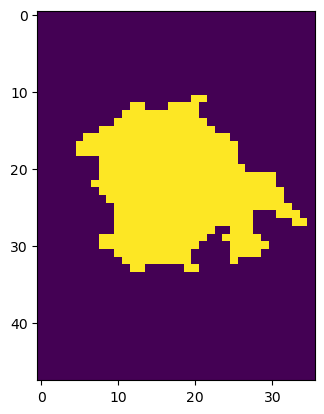

In [17]:
maskpath = h08dir + '/map/dat/lnd_msk_/lndmsk.CAMA.tk5'
lndmsk = np.fromfile(maskpath, dtype=dtype).reshape(48, 36)
plt.imshow(lndmsk)
plt.show()

In [20]:
cty_num = 1 # tokyo

ctymsk_load = f"{h08dir}/map/dat/cty_msk_/city_{cty_num:08}{SUF}"
ctyprf_load = f"{h08dir}/map/dat/cty_prf_/city_{cty_num:08}{SUF}"
ctyswg_load = f"{h08dir}/map/dat/cty_swg_/city_{cty_num:08}{SUF}"
#ctyint_load = f"{h08dir}/map/dat/cty_int_/city_{cty_num:08}{SUF}"
#load_list = [ctymsk_load, ctyprf_load, ctyswg_load, ctyint_load]
load_list = [ctymsk_load, ctyprf_load, ctyswg_load]

ctymsk_save = f"{h08dir}/map/dat/cty_msk_/city_{cty_num:08}{tag}"
ctyprf_save = f"{h08dir}/map/dat/cty_prf_/city_{cty_num:08}{tag}"
ctyswg_save = f"{h08dir}/map/dat/cty_swg_/city_{cty_num:08}{tag}"
#ctyint_save = f"{h08dir}/map/dat/cty_int_/city_{cty_num:08}{tag}"
#save_list = [ctymsk_save, ctyprf_save, ctyswg_save, ctyint_save]
save_list = [ctymsk_save, ctyprf_save, ctyswg_save]

In [22]:
# save the files
p0mis = 0

save_flag = False
if save_flag is True:
    for loadfile, savefile in zip(load_list, save_list):
        data = np.fromfile(loadfile, dtype=dtype).reshape(gl5shape)
        tokyo = data[upperindex:lowerindex, leftindex:rightindex]
        tokyo.astype(np.float32).tofile(savefile)
        tokyomasked = np.where(lndmsk==1, tokyo, p0mis)
        tokyomasked.astype(np.float32).tofile(savefile)

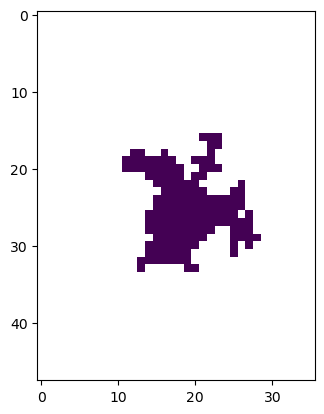

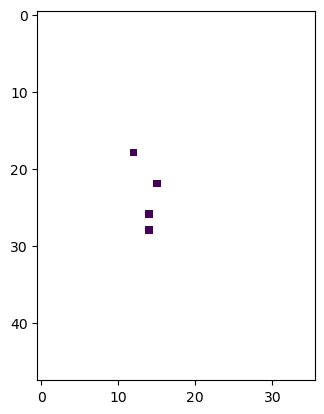

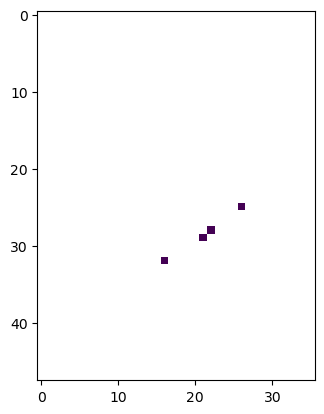

In [24]:
# view the files
tmppath = f"{h08dir}/map/dat/cty_msk_/city_{cty_num:08}{tag}"
tmpimg = np.fromfile(tmppath, dtype=dtype).reshape(48, 36)
tmpnew = np.ma.masked_where(tmpimg<=0, tmpimg)
plt.imshow(tmpnew)
plt.show()
tmppath = f"{h08dir}/map/dat/cty_prf_/city_{cty_num:08}{tag}"
tmpimg = np.fromfile(tmppath, dtype=dtype).reshape(48, 36)
tmpnew = np.ma.masked_where(tmpimg<=0, tmpimg)
plt.imshow(tmpnew)
plt.show()
tmppath = f"{h08dir}/map/dat/cty_swg_/city_{cty_num:08}{tag}"
tmpimg = np.fromfile(tmppath, dtype=dtype).reshape(48, 36)
tmpnew = np.ma.masked_where(tmpimg<=0, tmpimg)
plt.imshow(tmpnew)
plt.show()